## 예제
1. csv 폴더의 파일 4개 로드(tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1, tran_2 단순하게 행을 추가 결합(tran)
3. trand_d_1, tran_d_2 단순하게 행을 추가 결합(tran_d)
4. 2번과 3번과정에서 결합한 데이터프레임을 특정 조건에 맞춰서 left(tran)를 기준으로 열 결합(transaction)

In [117]:
import pandas as pd

In [118]:
## 파일 불러오기
tran_1 = pd.read_csv('../csv/tran_1.csv')
tran_2 = pd.read_csv('../csv/tran_2.csv')
tran_d_1 = pd.read_csv('../csv/tran_d_1.csv')
tran_d_2 = pd.read_csv('../csv/tran_d_2.csv')

In [119]:
## 단순하게 행 결합
tran = pd.concat([tran_1,tran_2], axis=0, ignore_index=True)

In [120]:
tran_d = pd.concat([tran_d_1,tran_d_2], axis=0, ignore_index=True)

In [121]:
tran.columns

Index(['transaction_id', 'price', 'payment_date', 'customer_id'], dtype='object')

In [122]:
tran_d.columns

Index(['detail_id', 'transaction_id', 'item_id', 'quantity'], dtype='object')

In [123]:
## 특정 조건에 맞춰서 tran을 기준으로 열을 추가 결합
## 특정조건(transaction_id)
## how (left = left)
transaction = pd.merge(tran,tran_d, on= 'transaction_id', how='left')
transaction

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


## 데이터결합2
1. 파일로드(customer_master, item_master)
2. 1번 과정에서 불러운 2개의 데이터프레임을 transaction 조건에 맞게 조인 결합
3. 결합이 된 데이터프레임에서 quantity 컬럼과 item-price 컬럼을 가지고 
   total_price 새로운 컬럼을 추가(quantity * itme_price)
4. payment_data 컬럼을 시게열 데이터로 변경

In [124]:
## 파일 불러오기
cust_master= pd.read_csv('../csv/customer_master.csv')
item_master= pd.read_csv('../csv/item_master.csv')

In [125]:
## 공통되는 컬럼 찾기
transaction.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1


In [126]:
cust_master.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [127]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [128]:
## transaction과 cust_master의 특정 조건으로 결합
## 조건 -> customer_id
tran1 = pd.merge(transaction, cust_master, on='customer_id', how = 'left')

In [129]:
## transaction과 customer_master의 특정 조건으로 결합
## 조건 -> item_id
tran2 = pd.merge(tran1,item_master, on='item_id', how='left')

In [130]:
tran2.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000


In [131]:
## total price 추가
tran2['total price'] = tran2['item_price'] * tran2['quantity']

In [132]:
tran2.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [133]:
#데이터 타입 확인
tran2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7144 non-null   object 
 1   price           7144 non-null   int64  
 2   payment_date    7144 non-null   object 
 3   customer_id     7144 non-null   object 
 4   detail_id       7144 non-null   int64  
 5   item_id         7144 non-null   object 
 6   quantity        7144 non-null   int64  
 7   name            6069 non-null   object 
 8   class           6069 non-null   object 
 9   gender          6069 non-null   object 
 10  start_date      6069 non-null   object 
 11  end_date        1978 non-null   object 
 12  campaign_id     6069 non-null   object 
 13  is_deleted      6069 non-null   float64
 14  item_name       7144 non-null   object 
 15  item_price      7144 non-null   int64  
 16  total price     7144 non-null   int64  
dtypes: float64(1), int64(5), object(1

In [134]:
## 시계열 데이터로 변환
tran2['payment_date'] = pd.to_datetime(tran2['payment_date'], format = '%Y-%m-%d %H:%M:%S')

In [135]:
tran2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [136]:
## 시계열 데이터에서 년도 - 월 부분만 따로 추출 -> payment_month 컬럼 생성

tran2['payment_month'] = tran2['payment_date'].dt.strftime('%Y-%m')

## 그룹화 예제
1. payment_month를 기준으로 그룹화
2. total_price의 합계, price의 합계를 출력
3. 2개의 합게를 matplotlib을 이용하여 라인 그래프로 시각화(subplot 이용)

In [137]:
tran2.groupby('payment_month').sum()

C:\Users\ezen\AppData\Local\Temp\ipykernel_10216\2390135767.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tran2.groupby('payment_month').sum()


,price,detail_id,quantity,is_deleted,item_price,total price
payment_month,,,,,,
2019-02,179190000,676866,1403,298.0,142805000,160185000
2019-03,175375000,2071474,1427,337.0,142980000,160370000
2019-04,176720000,3476816,1421,311.0,143670000,160510000
2019-05,171385000,4812795,1390,330.0,139655000,155420000
2019-06,183395000,6369999,1446,347.0,147090000,164030000
2019-07,188685000,8106846,1485,355.0,153215000,170620000


In [142]:
## payment_month를 기준을 그룹화

## case1
tran2.groupby('payment_month').sum()[['price','total price']]

## case2
tran2.groupby('payment_month').sum().loc[:,['price','total price']]

## case3
group_data = tran2.groupby('payment_month').sum().iloc[:,[0,5]]

C:\Users\ezen\AppData\Local\Temp\ipykernel_10216\4107436953.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tran2.groupby('payment_month').sum()[['price','total price']]
C:\Users\ezen\AppData\Local\Temp\ipykernel_10216\4107436953.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tran2.groupby('payment_month').sum().loc[:,['price','total price']]
C:\Users\ezen\AppData\Local\Temp\ipykernel_10216\4107436953.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns

In [143]:
group_data.head(1)

,price,total price
payment_month,,
2019-02,179190000,160185000


In [144]:
from matplotlib import pyplot as plt

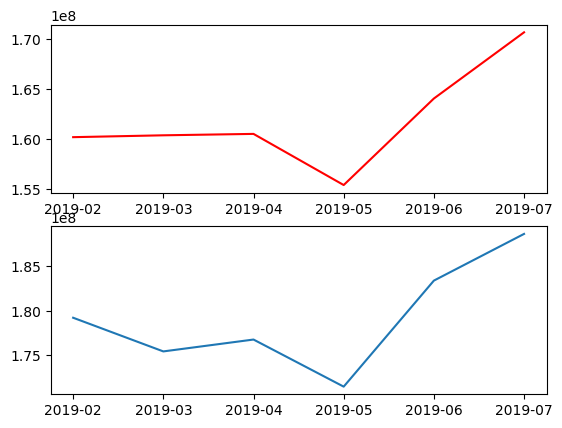

In [145]:
## 라인 그래프 시각화
## subplot을 이용하여 그래프를 2개 생성
plt.subplot(2,1,1)
plt.plot(group_data['total price'],'r')
plt.subplot(2,1,2)
plt.plot(group_data['price'])
plt.show()

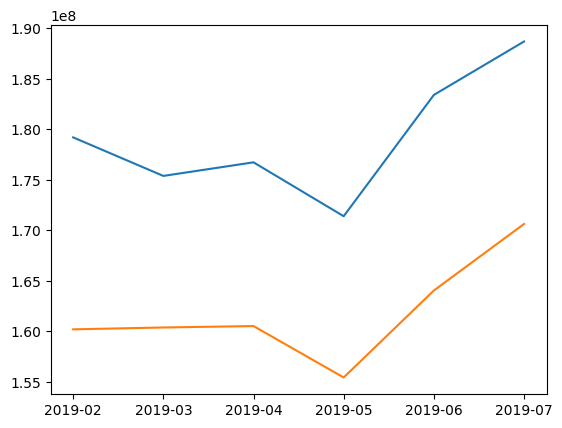

In [146]:
plt.plot(group_data)

### apply()
1. 시리즈의 형태의 데이터에서 각 항목들을 하나씩 함수에 대입하여 결과값을 시리즈 형태로 리턴 함수
2. apply(일반함수), apply(lambda함수)

### 예제3
1. tran2에서 gender 컬럼의 값들의 데이털르 확인
2. M, f, NAN 데이터의 있는 것을 확인
3. M은 남자, F는 여자, NaN는 무응답으로 데이터를 변경(apply 사용)

In [152]:
## gender 컬럼의 값 확인
tran2['gender']

0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

In [185]:
## M, f, NaN 데이터 확인
tran2['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [183]:
## M, f, NaN 데이터 확인
tran2['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [178]:
## NaN 데이터 개수 확인
tran2['gender'].isna().sum()


1075

In [188]:
## 'M' -> '남자, 'F'->'여자', ''무응답' 변환
## case1
def change(x):
    if x == 'M':
        return '남자'
        #result = '남자'
    elif x == 'F':
        return '남자'
        #result = '여자'
    else:
        return '무응답'
        #result = '무응답'
    #return result 

tran2['gender'].apply(change)      

## case2
tran2['gender'].apply(
    lambda x:'남자' if x == 'M' else ('여자' if x == 'F' else '무응답') 
    )

0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [189]:

## case2
tran3 = tran2.copy()
tran3['gender'].replace("M","남자").replace("F","여자").fillna('무응답')


0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object